In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# import iris.quickplot as qplt
# import iris
import pandas as pd
import datetime
from dateutil import relativedelta

In [3]:
%matplotlib inline

In [4]:
os.getcwd()

'C:\\Users\\kathy\\research\\Sea-ice-concentration\\p_pro'

In [5]:
os.chdir('C:\\Users\\kathy\\research\\Sea-ice-concentration\\data\\LCCA')
f = pd.read_csv('ALL_LCCA_2002_2019.csv')

In [6]:
# f = f.drop(columns=['MA'])
f.head()

,Date,Bremen,MERRA-2,NSIDC,OSI-401,OSI-408,ERA5
0,6/1/2002,0.22,0.26,0.18,NaN,NaN,0.0
1,6/2/2002,0.31,0.21,0.14,NaN,NaN,0.0
2,6/3/2002,0.24,0.18,0.20,NaN,NaN,0.0
3,6/4/2002,0.04,0.13,0.14,NaN,NaN,0.0
4,6/5/2002,0.03,0.00,0.00,NaN,NaN,0.0


In [7]:
N = 5
f['MA_0'] = f['LCCA (ERA5)'].rolling(window=N).mean()
f['MA_1']  = f['LCCA (MERRA2 LCCA 2002 2019.csv)'].rolling(window=N).mean()
f['MA_2'] = f['LCCA (ASI LCCA 2002 2019.csv)'].rolling(window=N).mean()
f['MA_3']  = f['LCCA (NT2 LCCA 2002 2019.csv)'].rolling(window=N).mean()
f['MA_4']  = f['LCCA (OSI401 LCCA 2002 2019.csv)'].rolling(window=N).mean()
f['MA_5']  = f['LCCA (OSI408 LCCA 2002 2019.csv)'].rolling(window=N).mean()

KeyError: 'LCCA (ERA5)'

In [11]:
LCCA = np.zeros((len(f['ERA5']),6))
LCCA[:,0] =f['ERA5']
LCCA[:,1] =f['MERRA-2']
LCCA[:,2] =f['Bremen']
LCCA[:,3] =f['NSIDC']
LCCA[:,4] =f['OSI-401']
LCCA[:,5] =f['OSI-408']

# LCCA[:,0] =f['LCCA (ERA5)']
# LCCA[:,1] =f['LCCA (MERRA2 LCCA 2002 2019.csv)']
# LCCA[:,2] =f['LCCA (ASI LCCA 2002 2019.csv)']
# LCCA[:,3] =f['LCCA (NT2 LCCA 2002 2019.csv)']
# LCCA[:,4] =f['LCCA (OSI401 LCCA 2002 2019.csv)']
# LCCA[:,5] =f['LCCA (OSI408 LCCA 2002 2019.csv)']

# LCCA.append(f['LCCA (ERA5)'])
# LCCA.append(f['LCCA (ASI LCCA 2002 2019.csv)'])
print(LCCA.shape)

(2754, 6)


In [152]:
LCCA_ma = np.zeros((len(f['LCCA (ERA5)']),6))
for i in range(0,6):
    ind = 'MA_'+str(i)
    LCCA_ma[:,i] = f[ind]
    
print(LCCA_ma.shape)

(2754, 6)


In [12]:
date = f.Date
date[0]

'6/1/2002'

In [13]:
x = np.arange(0,len(f.columns)-1,1)
x.shape

(6,)

In [14]:
y = np.arange(0,len(f.Date),1)
y.shape

(2754,)

In [15]:
DateTickInterval = 12
date1 = datetime.date(2002, 6, 1)
date2 = datetime.date(2019, 10, 31)
r = relativedelta.relativedelta(date2, date1)
NumMonths = r.years*12 + r.months
dates = [ date1 + relativedelta.relativedelta(months=n) for n in range(0,NumMonths+1,DateTickInterval)]
date_strings = [dt.strftime("%m/%Y") for dt in dates]
print (date_strings)

['06/2002', '06/2003', '06/2004', '06/2005', '06/2006', '06/2007', '06/2008', '06/2009', '06/2010', '06/2011', '06/2012', '06/2013', '06/2014', '06/2015', '06/2016', '06/2017', '06/2018', '06/2019']


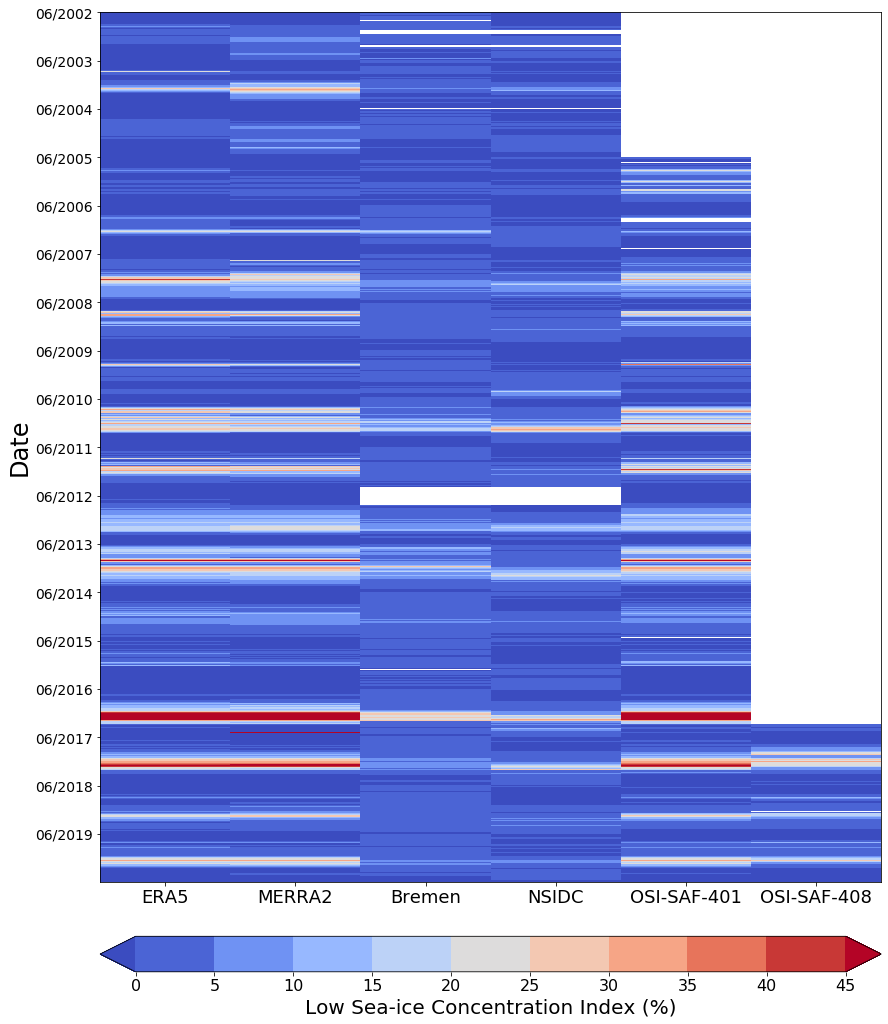

In [16]:
fig = plt.figure(figsize=(14,20))
clevs = np.arange(0,50,5)

for i in range(0,6):
   
    '1/ Original LCCA'
    LCCA_2d = np.vstack((LCCA[:,i],LCCA[:,i]))
    plt.contourf(np.linspace(i,i+1,2),y,LCCA_2d.T,clevs,cmap='coolwarm',extend="both")
    
    '2/ Moving Average of LCCA'
#     ind = 'MA_'+str(i)
#     LCCA_2d_ma = np.vstack((f[ind],f[ind]))
#     plt.contourf(np.linspace(i,i+1,2),y,LCCA_2d_ma.T,clevs,cmap='coolwarm',extend="both")

ax = plt.gca()
x_tick_labels = ['ERA5','MERRA2','Bremen','NSIDC','OSI-SAF-401','OSI-SAF-408']
ax.set_xticks(np.arange(0.5,6,1))
ax.set_xticklabels(x_tick_labels,fontsize=18)
ax.set_yticks(range(0,len(y),int(len(y)/len(date_strings))))
ax.set_yticklabels(date_strings,fontsize=14)
ax.invert_yaxis()
ax.set_ylabel('Date',fontsize=24)

cb = plt.colorbar(orientation="horizontal",pad=0.05)
cb.ax.set_xticklabels(np.arange(0,55,5),fontsize=16);
cb.set_label('Low Sea-ice Concentration Index (%)',fontsize=20)

# plt.savefig('Hovmoller_diagram_LICI.png')
# plt.savefig('Hovmoller_diagram_LICI_moving_average.png')
# plt.savefig('Hovmoller_diagram_LICI_moving_average_5.png')

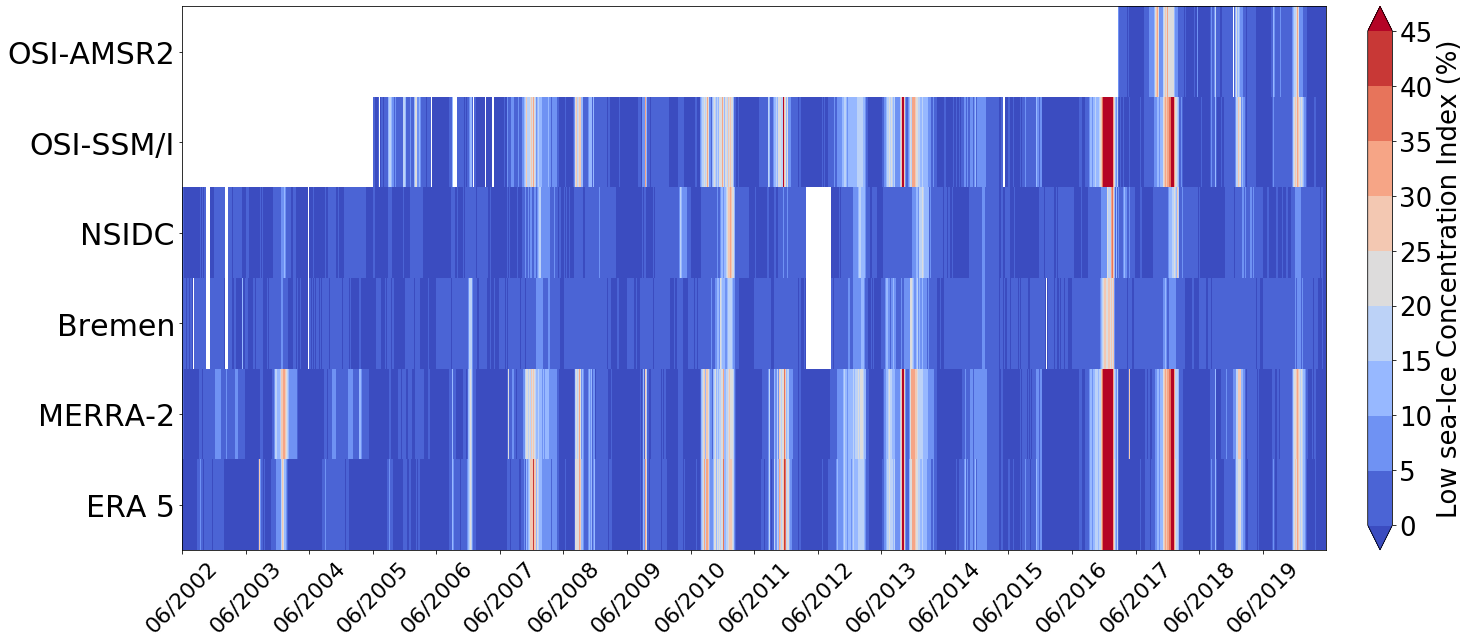

In [27]:
fig = plt.figure(figsize=(25,10))
clevs = np.arange(0,50,5)

for i in range(0,6):
   
    '1/ Original LCCA'
    LCCA_2d = np.vstack((LCCA[:,i],LCCA[:,i]))
    plt.contourf(y,np.linspace(i,i+1,2),LCCA_2d,clevs,cmap='coolwarm',extend="both")

#     plt.contourf(np.linspace(i,i+1,2),y,LCCA_2d.T,clevs,cmap='coolwarm',extend="both")
    
    '2/ Moving Average of LCCA'
#     ind = 'MA_'+str(i)
#     LCCA_2d_ma = np.vstack((f[ind],f[ind]))
#     plt.contourf(np.linspace(i,i+1,2),y,LCCA_2d_ma.T,clevs,cmap='coolwarm',extend="both")

ax = plt.gca()
y_tick_labels = ['ERA 5','MERRA-2','Bremen','NSIDC','OSI-SSM/I','OSI-AMSR2']
ax.set_yticks(np.arange(0.5,6,1))
ax.set_yticklabels(y_tick_labels,fontsize=30)
ax.set_xticks(range(0,len(y),int(len(y)/len(date_strings))))
ax.set_xticklabels(date_strings,rotation=45,fontsize=22)
# ax.invert_yaxis()

cb = plt.colorbar(orientation="vertical",fraction=0.15,pad=0.03)
cb.ax.set_yticklabels(np.arange(0,55,5),fontsize=26);
cb.set_label('Low sea-Ice Concentration Index (%)',fontsize=26)

plt.savefig('Hovmoller_diagram_LICI_h.png')
# plt.savefig('Hovmoller_diagram_LICI_moving_average.png')
# plt.savefig('Hovmoller_diagram_LICI_moving_average_5.png')

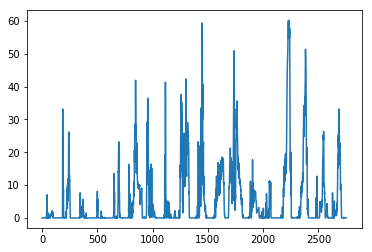

In [214]:
plt.plot(y,LCCA[:,0])

['01/06/2002', '01/06/2003', '01/06/2004', '01/06/2005', '01/06/2006', '01/06/2007', '01/06/2008', '01/06/2009', '01/06/2010', '01/06/2011', '01/06/2012', '01/06/2013', '01/06/2014', '01/06/2015', '01/06/2016', '01/06/2017', '01/06/2018', '01/06/2019']


relativedelta(years=+2, months=+11, days=+30)

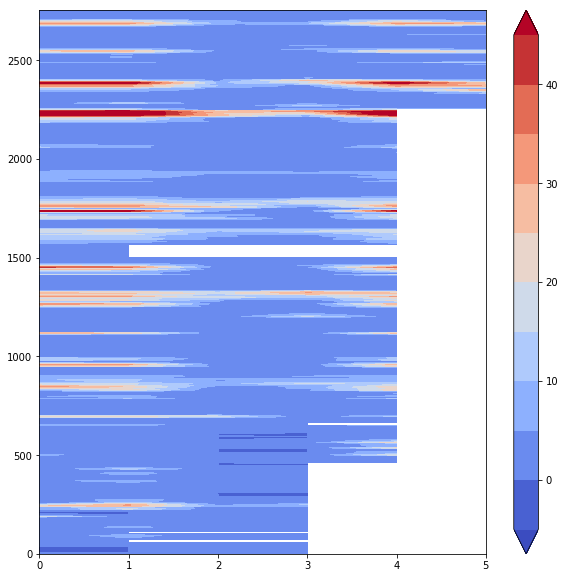

In [155]:
fig = plt.figure(figsize=(10,10))
clevs = np.arange(-5,50,5)

# plt.contourf(LCCA,clevs,cmap='coolwarm',extend="both",corner_mask=False)
plt.contourf(LCCA_ma,clevs,cmap='coolwarm',extend="both",corner_mask=False)

cb = plt.colorbar()

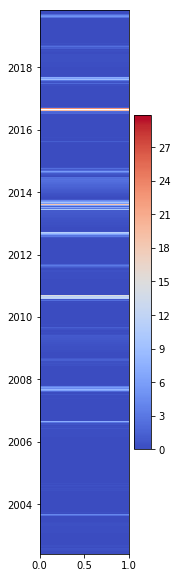

In [33]:
fig = plt.figure(figsize=(2,10))

clevs = np.arange(0,30,0.1)
# ax = plt.contourf(x,date0,LCCA0_2d.T,clevs)
# ax = plt.contourf(date0,x,LCCA0_2d,clevs)
plt.contourf(x,date0,LCCA0_2d.T,clevs,cmap='coolwarm')
# plt.contourf(x,np.arange(0,len(LCCA0),1),LCCA0_2d.T,clevs,cmap='coolwarm')
ax = plt.gca()
# ax.set_yticks(np.arange(0,len(LCCA0),100))
# plt.contourf(x1,date0,LCCA1_)

# ax.set_yticks(date0[0].year,date0[-1].year)
# plt.contourf(LCCA0_2d.T)

plt.colorbar()